In [25]:
#Importando bibliotecas utilizadas para adquirir os dados requisitados.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
#Importando planilha e tradução de colunas em Português.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

colunas_ptbr = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

df.columns = colunas_ptbr

#Definindo coluna 'classe' como um objeto
df['classe'] = df['classe'].astype(str)
df.dtypes


,0
classe,object
alcool,float64
acido_malico,float64
cinzas,float64
alcalinidade_de_cinzas,float64
magnesio,int64
fenois_totais,float64
flavanoides,float64
fenois_nao_flavanoides,float64
proantocianinas,float64


In [29]:
#Exploração inicial dos dados

#Visão geral do dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   classe                          177 non-null    object 
 1   alcool                          177 non-null    float64
 2   acido_malico                    177 non-null    float64
 3   cinzas                          177 non-null    float64
 4   alcalinidade_de_cinzas          177 non-null    float64
 5   magnesio                        177 non-null    int64  
 6   fenois_totais                   177 non-null    float64
 7   flavanoides                     177 non-null    float64
 8   fenois_nao_flavanoides          177 non-null    float64
 9   proantocianinas                 177 non-null    float64
 10  intensidade_de_cor              177 non-null    float64
 11  matiz                           177 non-null    float64
 12  od280_od315_de_vinhos_diluidos  177 

In [30]:
#Descrição geral do dataframe:
df.describe()

,alcool,acido_malico,cinzas,alcalinidade_de_cinzas,magnesio,fenois_totais,flavanoides,fenois_nao_flavanoides,proantocianinas,intensidade_de_cor,matiz,od280_od315_de_vinhos_diluidos,prolina
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [31]:
#Cotagem das diferentes classes conditas:

contagem_classes = df['classe'].value_counts()
print("Contagem das diferentes classes:")
print(contagem_classes)


Contagem das diferentes classes:
classe
2    71
1    58
3    48
Name: count, dtype: int64


In [32]:
#Estatísticas descritivas para as colunas solicitadas.

statistics = df[['alcool', 'acido_malico', 'magnesio', 'matiz']].describe()
print("\nEstatísticas descritivas:")
print(statistics)


Estatísticas descritivas:
           alcool  acido_malico    magnesio       matiz
count  177.000000    177.000000  177.000000  177.000000
mean    12.993672      2.339887   99.587571    0.956983
std      0.808808      1.119314   14.174018    0.229135
min     11.030000      0.740000   70.000000    0.480000
25%     12.360000      1.600000   88.000000    0.780000
50%     13.050000      1.870000   98.000000    0.960000
75%     13.670000      3.100000  107.000000    1.120000
max     14.830000      5.800000  162.000000    1.710000


In [33]:
#Insights:

print("\nInsights:")
for ins in ['alcool', 'acido_malico', 'magnesio', 'matiz']:
    media = df[ins].mean()
    mediana = df[ins].median()
    std_dev = df[ins].std()
    min_val = df[ins].min()
    max_val = df[ins].max()

    print(f"- {ins}:")
    print(f"  Média: {media:.2f}, Mediana: {mediana:.2f}, Desvio Padrão: {std_dev:.2f}")
    print(f"  Mínimo: {min_val:.2f}, Máximo: {max_val:.2f}")



Insights:
- alcool:
  Média: 12.99, Mediana: 13.05, Desvio Padrão: 0.81
  Mínimo: 11.03, Máximo: 14.83
- acido_malico:
  Média: 2.34, Mediana: 1.87, Desvio Padrão: 1.12
  Mínimo: 0.74, Máximo: 5.80
- magnesio:
  Média: 99.59, Mediana: 98.00, Desvio Padrão: 14.17
  Mínimo: 70.00, Máximo: 162.00
- matiz:
  Média: 0.96, Mediana: 0.96, Desvio Padrão: 0.23
  Mínimo: 0.48, Máximo: 1.71


Text(0.5, 1.0, 'Boxplot de Magnésio')

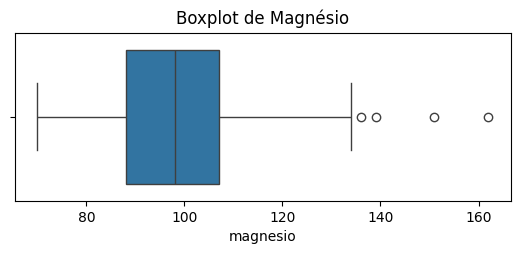

In [34]:
#Criação de bloxplots de colunas solicitadas:


# Criando os boxplots

#Magnésio
plt.subplot(2, 1, 2)
sns.boxplot(x=df['magnesio'])
plt.title('Boxplot de Magnésio')



Text(0.5, 1.0, 'Boxplot de Prolina')

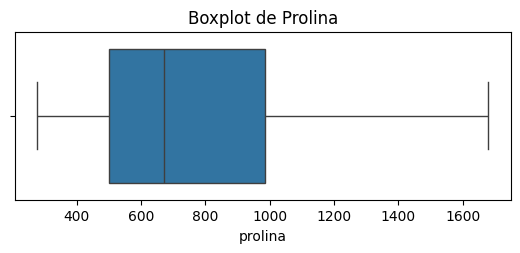

In [35]:
#Prolina

plt.subplot(2, 1, 1)
sns.boxplot(x=df['prolina'])
plt.title('Boxplot de Prolina')

Text(0.5, 1.0, 'Boxplot de Cinzas')

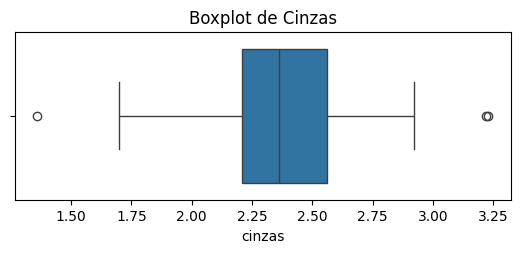

In [36]:
#Cinzas

plt.subplot(2, 1, 2)
sns.boxplot(x=df['cinzas'])
plt.title('Boxplot de Cinzas')

Text(0.5, 1.0, 'Boxplot de Álcool')

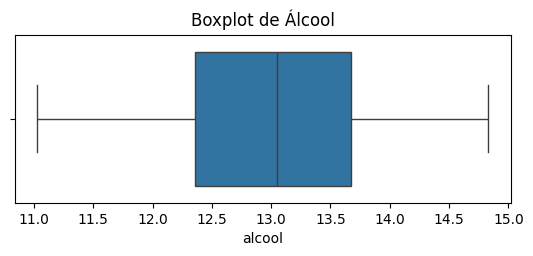

In [37]:
#Álcool

plt.subplot(2, 1, 2)
sns.boxplot(x=df['alcool'])
plt.title('Boxplot de Álcool')

<Figure size 1000x600 with 0 Axes>

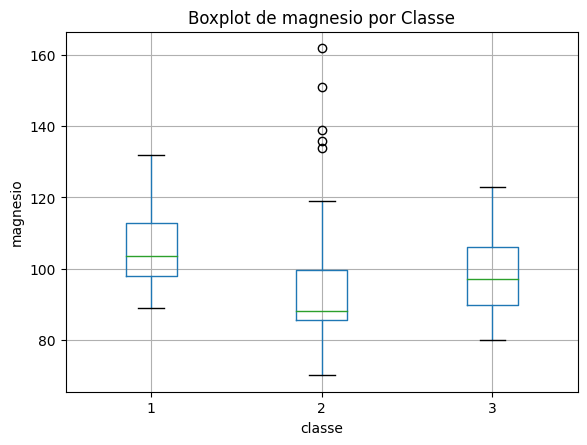

<Figure size 1000x600 with 0 Axes>

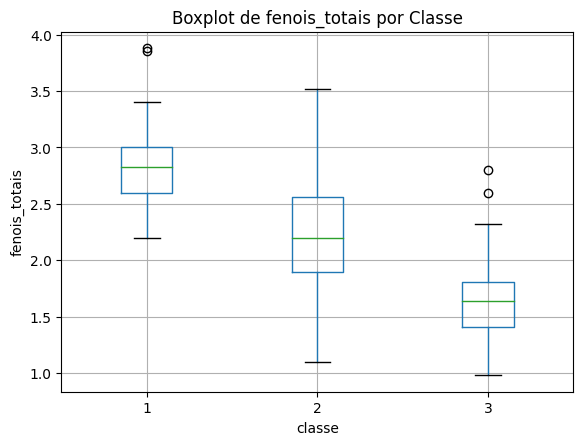

<Figure size 1000x600 with 0 Axes>

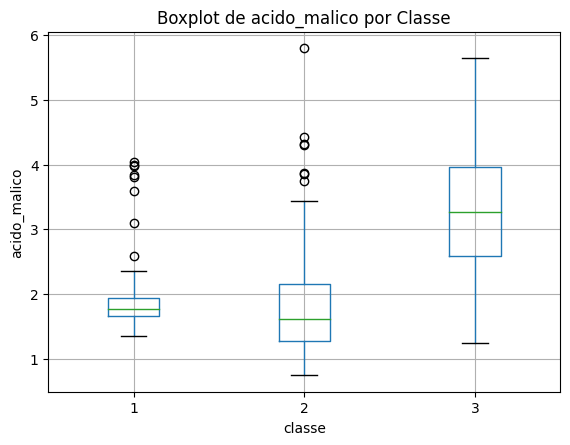

<Figure size 1000x600 with 0 Axes>

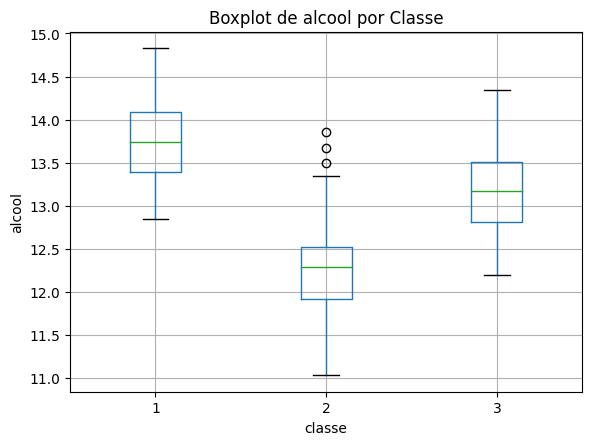

In [38]:
#Boxplots segregados por classe:

colunas = ['magnesio', 'fenois_totais', 'acido_malico', 'alcool']

for box in colunas:
  plt.figure(figsize=(10, 6))
  df.boxplot(column=box, by='classe')
  plt.title(f'Boxplot de {box} por Classe')
  plt.suptitle('')
  plt.ylabel(box)
  plt.show()

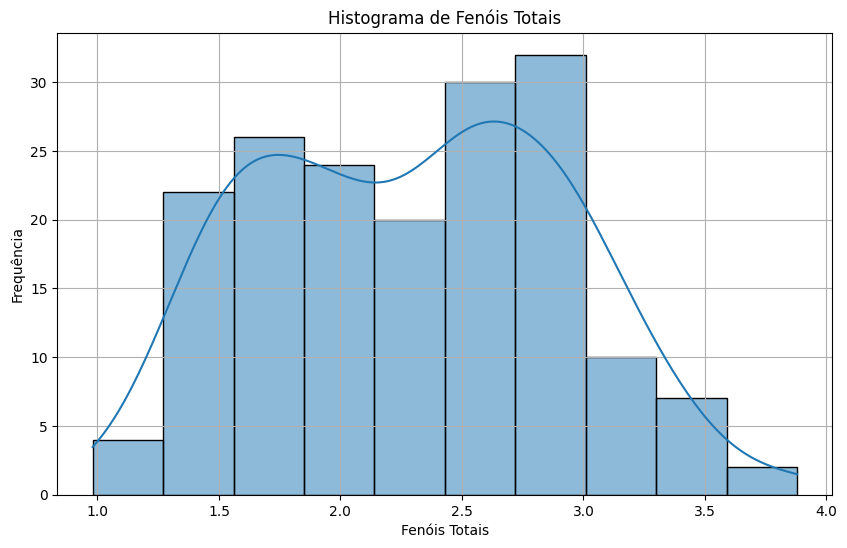

In [39]:
#Histograma da coluna 'fenois_totais'

plt.figure(figsize=(10, 6))
sns.histplot(df['fenois_totais'], bins=10, kde=True)
plt.title('Histograma de Fenóis Totais')
plt.xlabel('Fenóis Totais')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

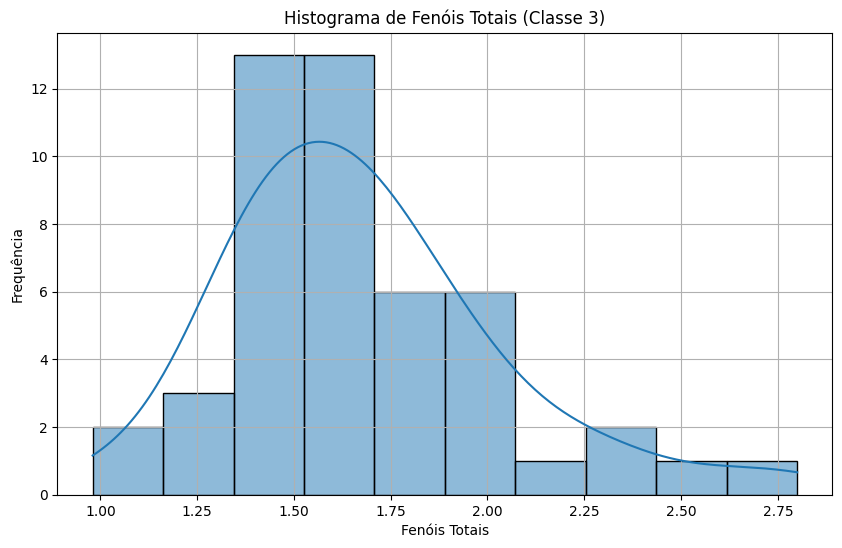

In [40]:
#Histograma da coluna 'fenois_totais' apenas para classe 3:

vinhos_3 = df[df['classe'] == '3']

plt.figure(figsize=(10, 6))
sns.histplot(vinhos_3['fenois_totais'], bins=10, kde=True)
plt.title('Histograma de Fenóis Totais (Classe 3)')
plt.xlabel('Fenóis Totais')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()